# BUILDING A HANDWRITTEN DIGITS CLASSIFIER

In this project I will try to find proper model to classify handwritten digits. I will use Scikit-Learn [datasets](https://scikit-learn.org/stable/datasets/index.html). Handwritten digits dataset is copied from [UCI](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) by Scikit-Learn.

### Opening Data

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline



In [2]:
digits_data = load_digits()

In [3]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
labels= pd.Series(digits_data["target"])

In [5]:
data= pd.DataFrame(digits_data["data"])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


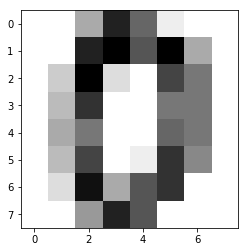

In [6]:
#The first image of the handwritten digits dataset.
first_image= data.iloc[0]
np_image= first_image.values
np_image= np_image.reshape(8,8)
plt.imshow(np_image, cmap= "gray_r")

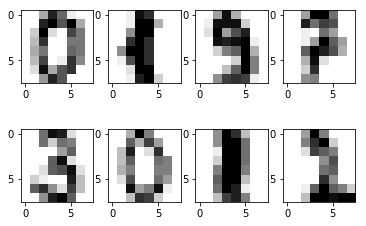

In [7]:
#Let's take a look to other digits
f,axarr= plt.subplots(2,4)

axarr[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap="gray_r")
axarr[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap="gray_r")
axarr[0,2].imshow(data.iloc[199].values.reshape(8,8),cmap="gray_r")
axarr[0,3].imshow(data.iloc[299].values.reshape(8,8),cmap="gray_r")
axarr[1,0].imshow(data.iloc[999].values.reshape(8,8),cmap="gray_r")
axarr[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap="gray_r")
axarr[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap="gray_r")
axarr[1,3].imshow(data.iloc[1299].values.reshape(8,8),cmap="gray_r")


I will try to develop a model to detect these digits. I will use knn model and neural network models to fit. After that, I will check our model's accuracies. 

### Modelling With Knn

In [8]:
#We will create a function to train model
def train_knn(nneighbors, train_features, train_labels):
    knn= KNeighborsClassifier(n_neighbors= nneighbors)
    knn.fit(train_features, train_labels)
    return knn

In [9]:
#We will create a function to test our model
def test(model, test_features, test_labels):
    predictions= model.predict(test_features)
    train_test_df= pd.DataFrame()
    train_test_df["correct_label"]= test_labels
    train_test_df["predicted_label"]= predictions
    overall_accuracy= sum(train_test_df["predicted_label"]== train_test_df["correct_label"])/len(train_test_df)
    return overall_accuracy


In [10]:
#We will create cross validation function
def cross_validate(k):
    fold_accuracies= []
    kf= KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data):
        train_features, test_features= data.loc[train_index], data.loc[test_index]
        train_labels, test_labels= labels.loc[train_index], labels.loc[test_index]
        model= train_knn(k,train_features, train_labels)
        overall_accuracy= test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_one_accuracies= cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

In [11]:
#Let's calculate our accuracies with different k values.
k_values= list(range(1,10))
k_overall_accuracies= []

for k in k_values:
    k_accuracies= cross_validate(k)
    k_mean_accuracy= np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)

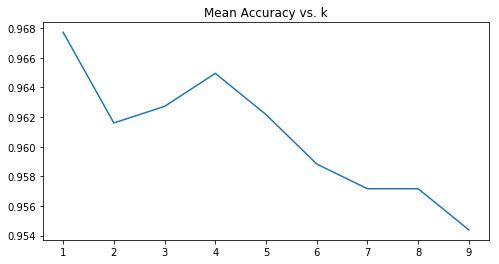

In [12]:
#We will plot the accuracies
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

I have a graphic which shows the accuracies for different k values. For another observation, let's start modelling with neural networks.

### Neural Network With One Hidden Layer

In [13]:
#Train Function
def train_nn(neuron_arch, train_features, train_labels):
    mlp=MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp


In [14]:
#Test Function
def test(model, test_features, test_labels):
    predictions= model.predict(test_features)
    train_test_df=pd.DataFrame()
    train_test_df["correct_label"]= test_labels
    train_test_df["predicted_label"]= predictions
    overall_accuracy= sum(train_test_df["predicted_label"]== train_test_df["correct_label"])/len(train_test_df)
    return overall_accuracy

In [15]:
#Cross Validation Function
def cross_validate(neuron_arch):
    fold_accuracies=[]
    kf= KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features= data.loc[train_index], data.loc[test_index]
        train_labels, test_labels= labels.loc[train_index],labels.loc[test_index]
        model= train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy= test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

I created our functions, I will calculate it's accuracies for one hidden layer, below.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

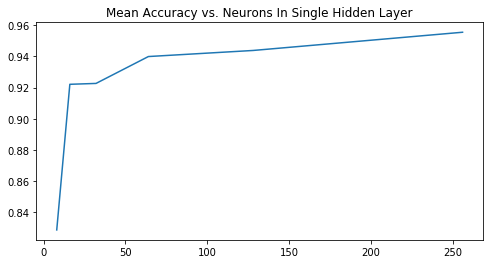

In [16]:
nn_one_neurons=[(8,),(16,),(32,),(64,),(128,),(256,)]
nn_one_accuracies=[]
for n in nn_one_neurons:
    nn_accuracies= cross_validate(n)
    nn_mean_accuracy= np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x= [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

In [17]:
nn_one_accuracies

[0.8286537985647117,
 0.9220799307102203,
 0.9226404355357585,
 0.9398874041078941,
 0.9437899034892353,
 0.9554788418708241]

I added more neurons to one hidden layer. As we can see on the graphic, more neurons are more useful to improve accuracy. 

### Neural Network With Two Hidden Layers

In [ ]:
nn_two_neurons=[ (64,64),(128,128),(256,256)]
nn_two_accuracies=[]
for n in nn_two_neurons:
    nn_accuracies= cross_validate(n)
    nn_mean_accuracy= np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x=[i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

My accuracy is improved with two hidden layer. And, I will try with three hidden layers.

In [ ]:
nn_two_accuracies

### Neural Network With Three Hidden Layers

In [ ]:
#We will create another cross validation function
#Our first cross validation is 4-fold.
#Now we will use 6-fold cross validation.
def cross_validate_six(neuron_arch):
    fold_accuracies=[]
    kf=KFold(n_splits=6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features= data.loc[train_index], data.loc[test_index]
        train_labels, test_labels= labels.loc[train_index], labels.loc[test_index]
        model= train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy= test(model,test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [ ]:
nn_three_neurons=[(10,10,10),(64,64,64),(128,128,128)]
nn_three_accuracies=[]
for n in nn_three_neurons:
    nn_accuracies= cross_validate_six(n)
    nn_mean_accuracy= np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x=[i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [ ]:
nn_three_accuracies

## Random Forest Classification

In this step I will make prediction with random forest classifier. After that I will visualize the accuracies.

In [ ]:
#Train Function
def train_random(nestimator, train_features, train_labels):
    clf= RandomForestClassifier(n_estimators= nestimator, random_state=1, min_samples_leaf=2)
    clf.fit(train_features, train_labels)
    return clf


In [ ]:
#Test Function
def test_random(model, test_features, test_labels):
    predictions= model.predict(test_features)
    train_test_df=pd.DataFrame()
    train_test_df["correct_label"]= test_labels
    train_test_df["predicted_label"]= predictions
    overall_accuracy= sum(train_test_df["predicted_label"]== train_test_df["correct_label"])/len(train_test_df)
    return overall_accuracy


In [ ]:
#We will create cross validation function
def cross_validate(k):
    fold_accuracies= []
    kf= KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data):
        train_features, test_features= data.loc[train_index], data.loc[test_index]
        train_labels, test_labels= labels.loc[train_index], labels.loc[test_index]
        model= train_random(k,train_features, train_labels)
        overall_accuracy= test_random(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies



In [ ]:
random_n_estimator=[(10),(50),(100),(200),(300),(800)]
random_accuracies=[]
for n in random_n_estimator:
    accuracies=cross_validate(n)
    mean_accuracy= np.mean(accuracies)
    random_accuracies.append(mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Random Forest Classifier")
plt.grid(True)

x=[i for i in random_n_estimator]
plt.plot(x, random_accuracies)

### Summary

With knn model my accuracy is approximately 96% and I used 4-fold cross validation to calculate accuracy. With neural networks, our accuracy starts with 86%. And, I can understand that accuracy is improved with more neurons on one hidden layers. It increase from approximately 86% to approximately 94%. After I used two hidden layers, my accuracy is evolved more, approximately 95%. In my last step I have tried three hidden layers for the model.I used 6-fold cross validation to calculate accuracy. Our accuracy 96% for three hidden layers. When I use more hidden layers and more neurons our model is going to be more successful. After that I tried random forest classifier, and I set my estimators as 10,50,100,200,300 and 800. My accuracies more than 90%. My accuracies are increasing while n_estimator increases. And, the accuracy comes close to 94% but this rise slows before it rises above 94%. I obtained highest accuracy with three hidden layers on neural networks as 96%.